In [153]:
import csv
import operator
import matplotlib.pyplot as plt
import numpy as np

class Pokemon:
    def __init__(self, number = '', name = '', primaryType = '', secondaryType = '', total = 0, hp = 0, attack = 0,
                 defense = 0, spAttack = 0, spDef = 0, speed = 0, generation = 0, legendary = False):
        self.number = number
        self.name = name
        self.primaryType = primaryType
        self.secondaryType = secondaryType
        self.total = total
        self.hp = hp
        self.attack = attack
        self.defense = defense
        self.spAttack = spAttack
        self.spDef = spDef
        self.speed = speed
        self.generation = generation
        self.legendary = legendary

    def getNumber(self):
        return self.number

    def getName(self):
        return self.name
    
    def getTotal(self):
        return self.total
    
    def getPrimaryType(self):
        return self.primaryType 
    
    def getSecondaryType(self):
        return self.secondaryType
    
    def getLegendary(self):
        return self.legendary
    
    
def savePokemonList(): 
    with open('Pokemon.csv') as pokemonFile:
        csvReader = csv.reader(pokemonFile, delimiter = ',')
        linenum = 0
        pokemonList = []
        for cell in csvReader:
            if linenum == 0:
                linenum += 1
            else:
                if not  cell[3]:
                    if cell[12].upper() == 'TRUE':
                        currentPokemon = Pokemon(cell[0], cell[1], cell[2], '', cell[4], cell[5], cell[6], cell[7], cell[8],
                                                 cell[9], cell[10], cell[11], True)
                    else:
                        currentPokemon = Pokemon(cell[0], cell[1], cell[2], '', cell[4], cell[5], cell[6], cell[7], cell[8],
                                                 cell[9], cell[10], cell[11], False)
                else: 
                    if cell[12].upper() == 'TRUE':
                        currentPokemon = Pokemon(cell[0], cell[1], cell[2], cell[3], cell[4], cell[5], cell[6], cell[7],
                                                 cell[8], cell[9], cell[10], cell[11], True)
                    else:
                        currentPokemon = Pokemon(cell[0], cell[1], cell[2], cell[3], cell[4], cell[5], cell[6], cell[7],
                                                 cell[8], cell[9], cell[10], cell[11], False)
                pokemonList.append(currentPokemon)
                linenum += 1
                
    return pokemonList
                
                
pokemonList = savePokemonList()
legendaryList = []

legendaryCount = 0
fireCount = 0
bugCount = 0
darkCount = 0
dragonCount = 0
electricCount = 0
fairyCount = 0
fightingCount = 0
flyingCount = 0
ghostCount = 0
grassCount = 0
groundCount = 0
iceCount = 0
normalCount =0
poisonCount = 0
psychicCount = 0
rockCount = 0
steelCount = 0
waterCount  = 0
highestSpAttack = 0

highestFireSpAttack = ''
for x in pokemonList:
    if x.getLegendary() == True:
        legendaryList.append(x)
        legendaryCount += 1
        
    if x.getPrimaryType() == "Bug":
        bugCount += 1   
   
    if x.getPrimaryType() == "Dark":
        darkCount += 1
        
    if x.getPrimaryType() == "Dragon":
        dragonCount += 1     

    if x.getPrimaryType() == "Electric":
        electricCount += 1
        
    if x.getPrimaryType() == "Fairy":
        fairyCount += 1   
   
    if x.getPrimaryType() == "Fighting":
        fightingCount += 1
        
    if x.getPrimaryType() == "Fire":
        fireCount += 1
        
    if x.getPrimaryType() == "Flying":
        flyingCount += 1     

    if x.getPrimaryType() == "Ghost":
        ghostCount += 1
        
    if x.getPrimaryType() == "Grass":
        grassCount += 1   
   
    if x.getPrimaryType() == "Ground":
        groundCount += 1
        
    if x.getPrimaryType() == "Ice":
        iceCount += 1     

    if x.getPrimaryType() == "Normal":
        normalCount += 1
        
    if x.getPrimaryType() == "Poison":
        poisonCount += 1   
   
    if x.getPrimaryType() == "Psychic":
        psychicCount += 1
        
    if x.getPrimaryType() == "Rock":
        rockCount += 1     
        
    if x.getPrimaryType() == "Steel":
        steelCount += 1
        
    if x.getPrimaryType() == "Water":
        waterCount += 1   
        
        if int(x.spAttack) > int(highestSpAttack):
            highestSpAttack = x.spAttack
            highestFireSpAttack = x.name
            
print("There are {} legendary pokemon".format(legendaryCount))
print("The fire pokemon with the highest SpAttack is {} with a SpAttack value of {}".format(highestFireSpAttack, highestSpAttack))

There are 65 legendary pokemon
The fire pokemon with the highest SpAttack is KyogrePrimal Kyogre with a SpAttack value of 180


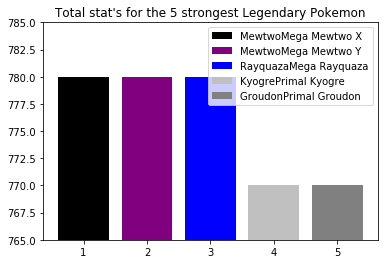

In [151]:
legendaryList.sort(key =operator.attrgetter('total'), reverse = True)
strongestNames = (legendaryList[0].name, legendaryList[1].name, legendaryList[2].name, legendaryList[3].name, legendaryList[4].name)
strongestTotals = []
for i in range (0,5):
    strongestTotals.append(int(legendaryList[i].getTotal()))
xpos = np.arange(1,6)
plt.ylim(765, 785)
plt.bar(1, strongestTotals[0], color = "Black", label = strongestNames[0])
plt.bar(2, strongestTotals[1], color = "Purple", label = strongestNames[1])
plt.bar(3, strongestTotals[2], color = "Blue", label = strongestNames[2])
plt.bar(4, strongestTotals[3], color = "Silver", label = strongestNames[3])
plt.bar(5, strongestTotals[4], color = "Gray", label = strongestNames[4])
plt.title("Total stat's for the 5 strongest Legendary Pokemon")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

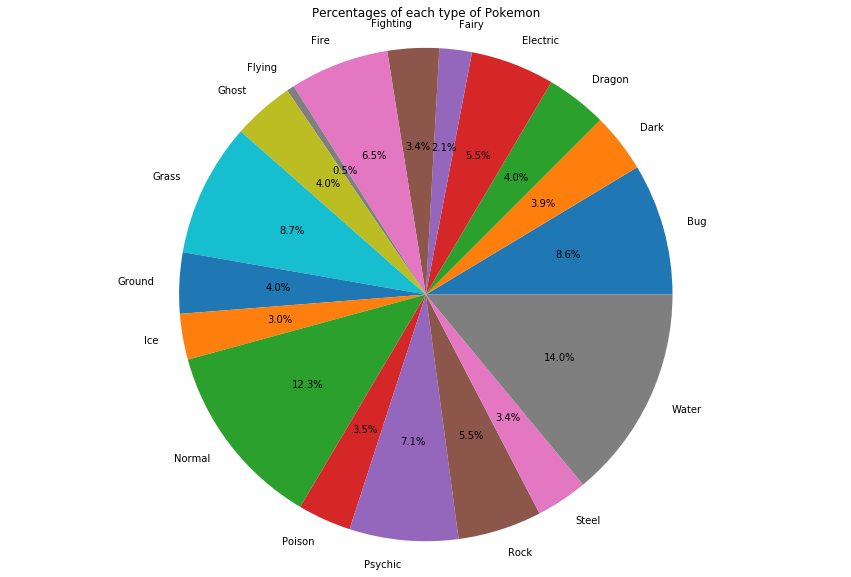

In [184]:
types = 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire' ,'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'
typeCounts = [bugCount, darkCount, dragonCount, electricCount, fairyCount, fightingCount, fireCount, flyingCount, ghostCount,
             grassCount, groundCount, iceCount, normalCount, poisonCount, psychicCount, rockCount, steelCount, waterCount]
explode = (0)
fig1, ax1 = plt.subplots(figsize = (15, 10))
ax1.pie(typeCounts, labels = types, autopct = '%1.1f%%')
plt.title("Percentages of each type of Pokemon")
ax1.axis('equal')
plt.show